In [1]:
"""
ECGR 5105 - Intro to Machine Learning
Homework 5, Part 1
Phillip Harmon
""";


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch


In [3]:
#Normalization Functions
def normalize(x, xmax, xmin):
    return (x - xmin) / (xmax - xmin)

def denormalize(x, xmax, xmin):
    return (x * (xmax - xmin)) + xmin


In [4]:
#Define the linear model
def model_linear(x, w):
    return w[1] * x + w[0]

#Define the nonlinear model
def model_quadratic(x, w):
    return w[2] * x * x + w[1] * x + w[0]

#Define the loss function
def cost(y_p, y):
    square_error = (y_p - y)**2
    return square_error.mean()

#Define Forward Pass Function
def forward_pass(x, y, params, model=model_linear, enable_grad=True):
    with torch.set_grad_enabled(enable_grad):
        loss = cost( model(x, params) , y)
    return loss


In [5]:
#Define the Training Loop
def train_loop(params, x_t, y_t, x_v, y_v, model, epochs=5000, learn_rate=1e-2):
    training_loss = []
    validation_loss = []
    for epoch in range(1, epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
    
        loss_t = forward_pass(
            x = x_t,
            y = y_t,
            params = params,
            model = model,
            enable_grad = True)
        
        loss_v = forward_pass(
            x = x_v,
            y = y_v,
            params = params,
            model = model,
            enable_grad = False)
        
        training_loss.append(float(loss_t))
        validation_loss.append(float(loss_v))
        
        loss_t.backward()
        
        with torch.no_grad():
            params -= learn_rate * params.grad
        
        if epoch <= 3 or epoch % 500 == 0:
            print('Epoch {} | Training Loss = {} | Validation Loss = {}'.format(epoch, loss_t, loss_v))

    return params, training_loss, validation_loss


In [6]:
#helper for plotting visualization of training data
def training_visual(loss_t, loss_v):
    plt.rcParams["figure.figsize"] = (10,5)
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('Convergence of Training')
    plt.plot(range(1,len(loss_t) + 1),loss_t, color='blue', label='Training Loss')
    plt.plot(range(1,len(loss_t) + 1),loss_v, color='red', label='Validation Loss')
    plt.legend()
    #plt.ylim([0.0,0.25])
    plt.show()
    print("Final Training Loss = {} | Final Validation Loss = {}".format(loss_t[-1], loss_v[-1]))


In [7]:
#helper for plotting visualization of training data
def plot_results(x, y, params, model, x_label='X', y_label='Y', title='Y vs. X'):
    x_n = normalize(x, x.max(0,keepdim=True)[0], x.min(0,keepdim=True)[0])
    y_n = normalize(y, y.max(0,keepdim=True)[0], y.min(0,keepdim=True)[0])
    lin_x = torch.tensor(np.arange(min(x_n), max(x_n), (max(x_n) - min(x_n)) / 200)).detach()
    lin_y = model(lin_x, params).detach()
    y_p = model(x_n, params)
    
    lin_x = denormalize(lin_x, x.max(0,keepdim=True)[0], x.min(0,keepdim=True)[0])
    lin_y = denormalize(lin_y, y.max(0,keepdim=True)[0], y.min(0,keepdim=True)[0])
    y_p = denormalize(y_p, y.max(0,keepdim=True)[0], y.min(0,keepdim=True)[0])
    
    print("Model MSE Loss for whole dataset = {}".format(cost(model(x_n,params) , y_n)))
    
    plt.rcParams["figure.figsize"] = (10,5)
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.scatter(x, y, color='red', label='Ground Truths')
    plt.scatter(x, y_p, color='blue', label='Predictions', marker="x")
    plt.plot(lin_x, lin_y, color='cyan', label='Model Curve', ls='--')
    plt.legend()
    plt.show()
    

In [8]:
#Prepare the inputs
#measurement
xarr = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
x_raw = torch.tensor(xarr)
#celcius
yarr = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
y_raw = torch.tensor(yarr)

#Cleaning the inputs
x = normalize(x_raw, x_raw.max(0,keepdim=True)[0], x_raw.min(0,keepdim=True)[0])
y = normalize(y_raw, y_raw.max(0,keepdim=True)[0], y_raw.min(0,keepdim=True)[0])

#Train/Test Split
validation_percent = 0.2
split = int(validation_percent * x.shape[0])
shuffle_index = torch.randperm(x.shape[0])
index_t = shuffle_index[:-split]
index_v = shuffle_index[-split:]
x_t = x[index_t]
y_t = y[index_t]
x_v = x[index_v]
y_v = y[index_v]

#Define Constructs
epochs = 5000


Linear Model, Learning Rate = 0.01
Epoch 1 | Training Loss = 0.4392632246017456 | Validation Loss = 0.08251953125
Epoch 2 | Training Loss = 0.42202311754226685 | Validation Loss = 0.076636403799057
Epoch 3 | Training Loss = 0.40559130907058716 | Validation Loss = 0.07138841599225998
Epoch 500 | Training Loss = 0.03325355052947998 | Validation Loss = 0.13743098080158234
Epoch 1000 | Training Loss = 0.01530188787728548 | Validation Loss = 0.06859982758760452
Epoch 1500 | Training Loss = 0.007968182675540447 | Validation Loss = 0.037055011838674545
Epoch 2000 | Training Loss = 0.004972160793840885 | Validation Loss = 0.021979261189699173
Epoch 2500 | Training Loss = 0.0037482124753296375 | Validation Loss = 0.014421489089727402
Epoch 3000 | Training Loss = 0.00324819702655077 | Validation Loss = 0.010439775884151459
Epoch 3500 | Training Loss = 0.003043925855308771 | Validation Loss = 0.008241587318480015
Epoch 4000 | Training Loss = 0.0029604758601635695 | Validation Loss = 0.00697827525

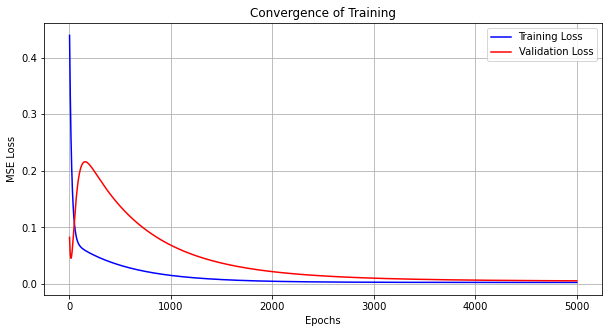

Final Training Loss = 0.002912455704063177 | Final Validation Loss = 0.005773251876235008
Model MSE Loss for whole dataset = 0.0034324584994465113


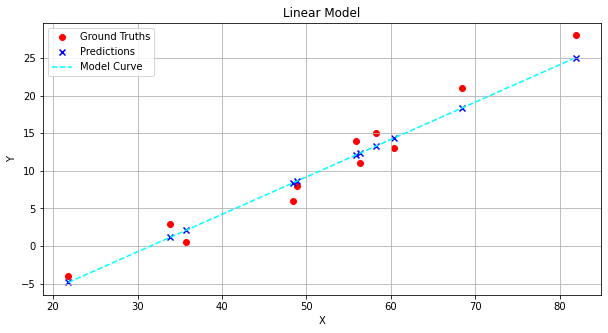

In [9]:
"""Linear Model, 5000 epochs, LR=1e-2"""
print("Linear Model, Learning Rate = {}".format(1e-2))
param, loss_t, loss_v = train_loop(
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    learn_rate = 1e-2,
    model = model_linear);

training_visual(loss_t, loss_v)
param.requires_grad = False
plot_results(
    x = x_raw,
    y = y_raw,
    params = param,
    model = model_linear,
    title = "Linear Model"
    )


Quadratic Model, Learning Rate = 0.1
Epoch 1 | Training Loss = 1.1159790754318237 | Validation Loss = 1.0119781494140625
Epoch 2 | Training Loss = 0.6310301423072815 | Validation Loss = 0.47319698333740234
Epoch 3 | Training Loss = 0.3597252368927002 | Validation Loss = 0.20560511946678162
Epoch 500 | Training Loss = 0.0025247116573154926 | Validation Loss = 0.001958972541615367
Epoch 1000 | Training Loss = 0.002356366254389286 | Validation Loss = 0.0014451019233092666
Epoch 1500 | Training Loss = 0.002238175133243203 | Validation Loss = 0.0014001831877976656
Epoch 2000 | Training Loss = 0.002155187539756298 | Validation Loss = 0.0016236853552982211
Epoch 2500 | Training Loss = 0.002096919110044837 | Validation Loss = 0.0019943180959671736
Epoch 3000 | Training Loss = 0.00205600680783391 | Validation Loss = 0.002433623420074582
Epoch 3500 | Training Loss = 0.002027279930189252 | Validation Loss = 0.002892129123210907
Epoch 4000 | Training Loss = 0.0020071109756827354 | Validation Loss 

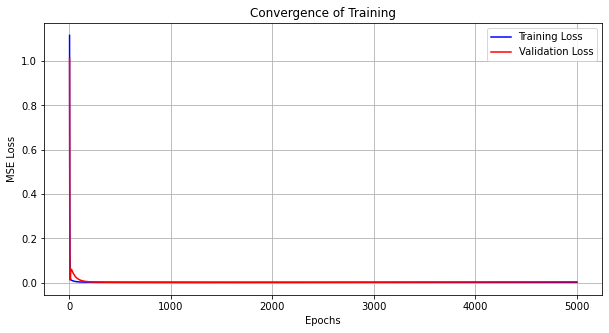

Final Training Loss = 0.001983006251975894 | Final Validation Loss = 0.0041424003429710865
Model MSE Loss for whole dataset = 0.0023757393937557936


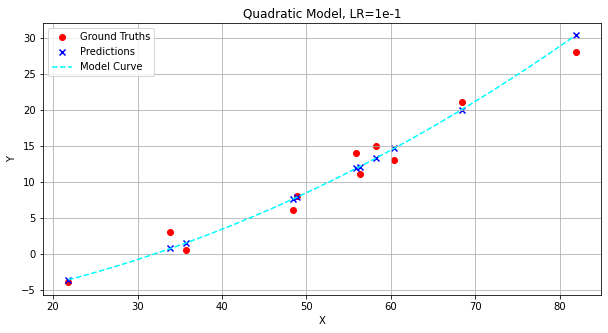

In [10]:
"""Quadratic Model, 5000 epochs, LR=1e-1"""
print("Quadratic Model, Learning Rate = {}".format(1e-1))
param, loss_t, loss_v = train_loop(
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    learn_rate = 1e-1,
    model = model_quadratic);

training_visual(loss_t, loss_v)
param.requires_grad = False
plot_results(
    x = x_raw,
    y = y_raw,
    params = param,
    model = model_quadratic,
    title = "Quadratic Model, LR=1e-1"
    )


Quadratic Model, Learning Rate = 0.01
Epoch 1 | Training Loss = 1.1159790754318237 | Validation Loss = 1.0119781494140625
Epoch 2 | Training Loss = 1.0611895322799683 | Validation Loss = 0.9488234519958496
Epoch 3 | Training Loss = 1.0091272592544556 | Validation Loss = 0.889259397983551
Epoch 500 | Training Loss = 0.006314016878604889 | Validation Loss = 0.032410189509391785
Epoch 1000 | Training Loss = 0.0036123048048466444 | Validation Loss = 0.013132939115166664
Epoch 1500 | Training Loss = 0.0029110193718224764 | Validation Loss = 0.006675686687231064
Epoch 2000 | Training Loss = 0.0027154150884598494 | Validation Loss = 0.004231832455843687
Epoch 2500 | Training Loss = 0.0026481228414922953 | Validation Loss = 0.003179206047207117
Epoch 3000 | Training Loss = 0.002613841090351343 | Validation Loss = 0.0026632335502654314
Epoch 3500 | Training Loss = 0.0025884974747896194 | Validation Loss = 0.002375128213316202
Epoch 4000 | Training Loss = 0.002565988339483738 | Validation Loss =

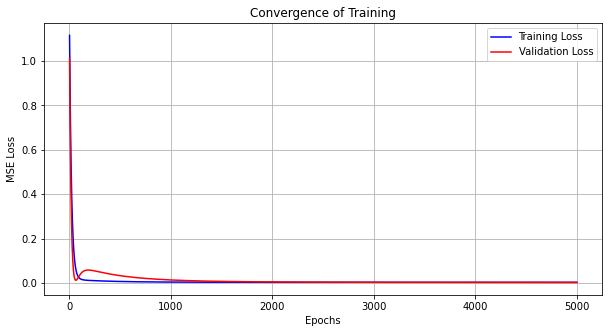

Final Training Loss = 0.002524381037801504 | Final Validation Loss = 0.0019581953529268503
Model MSE Loss for whole dataset = 0.002421372104436159


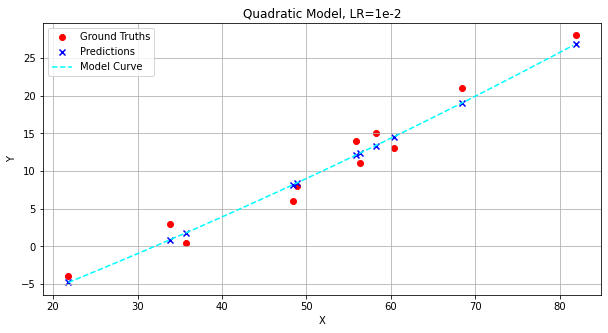

In [11]:
"""Quadratic Model, 5000 epochs, LR=1e-2"""
print("Quadratic Model, Learning Rate = {}".format(1e-2))
param, loss_t, loss_v = train_loop(
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    learn_rate = 1e-2,
    model = model_quadratic);

training_visual(loss_t, loss_v)
param.requires_grad = False
plot_results(
    x = x_raw,
    y = y_raw,
    params = param,
    model = model_quadratic,
    title = "Quadratic Model, LR=1e-2"
    )


Quadratic Model, Learning Rate = 0.001
Epoch 1 | Training Loss = 1.1159790754318237 | Validation Loss = 1.0119781494140625
Epoch 2 | Training Loss = 1.1104371547698975 | Validation Loss = 1.0055698156356812
Epoch 3 | Training Loss = 1.104923129081726 | Validation Loss = 0.9991985559463501
Epoch 500 | Training Loss = 0.10345166176557541 | Validation Loss = 0.020854901522397995
Epoch 1000 | Training Loss = 0.020564958453178406 | Validation Loss = 0.0340411551296711
Epoch 1500 | Training Loss = 0.012678220868110657 | Validation Loss = 0.05485355854034424
Epoch 2000 | Training Loss = 0.010952466167509556 | Validation Loss = 0.05727146938443184
Epoch 2500 | Training Loss = 0.009859978221356869 | Validation Loss = 0.053653694689273834
Epoch 3000 | Training Loss = 0.008940544910728931 | Validation Loss = 0.04879271239042282
Epoch 3500 | Training Loss = 0.008141514845192432 | Validation Loss = 0.04403477907180786
Epoch 4000 | Training Loss = 0.007445048075169325 | Validation Loss = 0.039697743

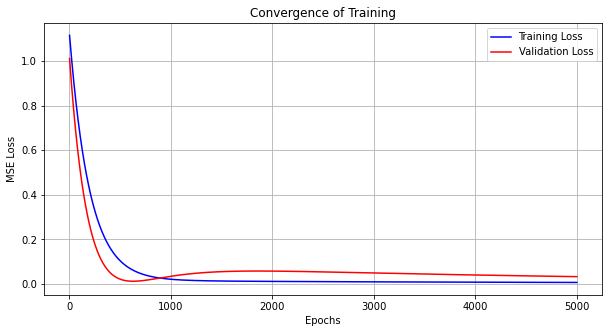

Final Training Loss = 0.006308177951723337 | Final Validation Loss = 0.03237129747867584
Model MSE Loss for whole dataset = 0.011044936254620552


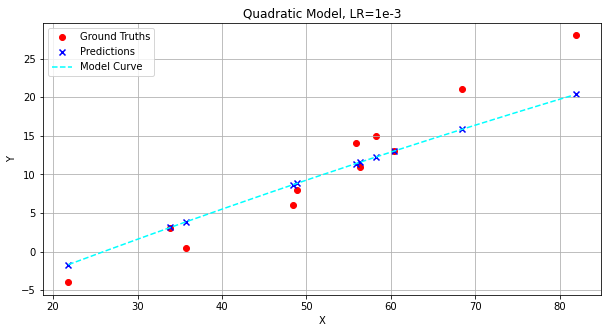

In [12]:
"""Quadratic Model, 5000 epochs, LR=1e-3"""
print("Quadratic Model, Learning Rate = {}".format(1e-3))
param, loss_t, loss_v = train_loop(
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    learn_rate = 1e-3,
    model = model_quadratic);

training_visual(loss_t, loss_v)
param.requires_grad = False
plot_results(
    x = x_raw,
    y = y_raw,
    params = param,
    model = model_quadratic,
    title = "Quadratic Model, LR=1e-3"
    )


Quadratic Model, Learning Rate = 0.0001
Epoch 1 | Training Loss = 1.1159790754318237 | Validation Loss = 1.0119781494140625
Epoch 2 | Training Loss = 1.1154241561889648 | Validation Loss = 1.011336326599121
Epoch 3 | Training Loss = 1.1148697137832642 | Validation Loss = 1.0106948614120483
Epoch 500 | Training Loss = 0.8711451888084412 | Validation Loss = 0.7338039875030518
Epoch 1000 | Training Loss = 0.6804319620132446 | Validation Loss = 0.5259684324264526
Epoch 1500 | Training Loss = 0.5322036147117615 | Validation Loss = 0.3721737861633301
Epoch 2000 | Training Loss = 0.416988343000412 | Validation Loss = 0.2593950033187866
Epoch 2500 | Training Loss = 0.32742494344711304 | Validation Loss = 0.17763149738311768
Epoch 3000 | Training Loss = 0.2577933967113495 | Validation Loss = 0.11921809613704681
Epoch 3500 | Training Loss = 0.20365063846111298 | Validation Loss = 0.0782928392291069
Epoch 4000 | Training Loss = 0.1615433543920517 | Validation Loss = 0.050381358712911606
Epoch 450

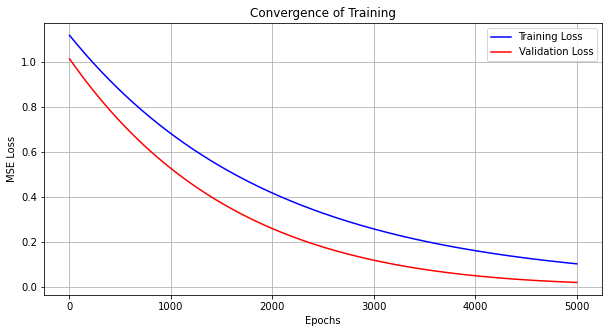

Final Training Loss = 0.10330072790384293 | Final Validation Loss = 0.020799720659852028
Model MSE Loss for whole dataset = 0.08826077729463577


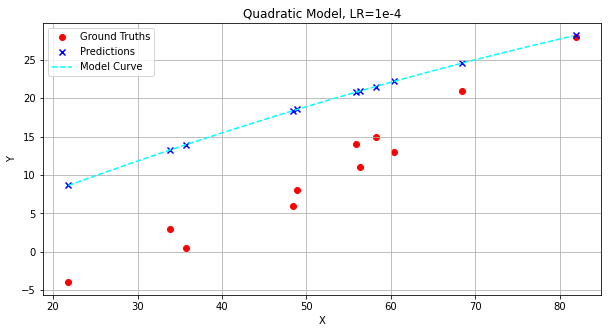

In [13]:
"""Quadratic Model, 5000 epochs, LR=1e-4"""
print("Quadratic Model, Learning Rate = {}".format(1e-4))
param, loss_t, loss_v = train_loop(
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    learn_rate = 1e-4,
    model = model_quadratic);

training_visual(loss_t, loss_v)
param.requires_grad = False
plot_results(
    x = x_raw,
    y = y_raw,
    params = param,
    model = model_quadratic,
    title = "Quadratic Model, LR=1e-4"
    )
